# 基础概念
计算图是一种用于描述计算流程的**有向无环图（DAG）**，是一种**数据结构**。其中，节点表示算子（如加法、乘法等基础操作）或者变量（输入、中间结果），边表示数据流动的方向。
例如：

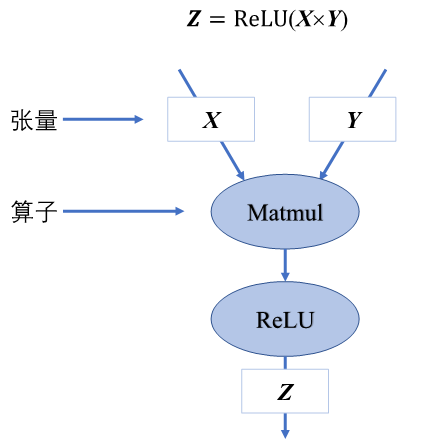

<!-- ![整体框架流程](.\pic\framework_arch01.png "整体框架流程") -->
## 自动微分与计算图之间的关系
* 前向传播：计算图记录所有的操作步骤，按照顺序执行算子，生成最终的输出
* 反向传播：自动微分反向遍历计算图，利用链式法则从输出到输入逐层计算梯度。


# 计算图的基本组成
计算图是由基本数据结构**张量**和基本运算单元**算子**构成。节点表示算子，边表示张量状态，同时描述了计算间的依赖关系。同时还包含特殊的操作：如：程序代码中的 For/While 等构建控制流；和特殊的边：如：控制边表示节点间依赖。

控制流是指设定特定的顺序执行计算任务，构建更复杂的模型。目前主流的机器学习框架通常使用两种方式来提供控制流：前端语言控制流（图外方法）和机器学习框架控制原语（图内方法）。对于if语句在反向传播时同样遵守控制流决策。对于循环语句，每次操作都赋予独特的运算标识符，避免循环依赖。

# 计算图的生成
计算图分为静态图和动态图两种，动态图是指在代码逐行执行时动态生成计算图，每次前向传播都会重新构建计算图。方便调试，并且灵活性高。但性能较差，无法预先优化计算图。静态图是指预先定义完整的计算图结构，在通过“会话”统一执行。方便对计算图优化，但灵活性低。

In [ ]:
# 静态图生成，以 TensorFlow 1.x为例：
import tensorflow as tf
# 定义阶段（构建计算图）
x = tf.placeholder(tf.float32)
y = x * 2 + 1

# 编译阶段（隐式发生，由TensorFlow内部完成优化）
# 执行阶段（通过Session运行）
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer()) #静态图变量初始化
    result = sess.run(y, feed_dict={x: 3.0})  # 输出 7.0

In [ ]:
# 动态图生成
import torch
x = torch.tensor(3.0, requires_grad=True)
y = x * 2 + 1  # 立即执行计算，并记录计算图
y.backward()    # 反向传播时动态生成梯度计算图，并且计算图在反向传播后立即销毁。下次调用需要重新构建计算图

# todo
1.  计算图的调度
2.  算子优化
3.  并行计算